### Comparing the sets of TSRs identified in Arabidopsis from various profiling methods

In [1]:
library(rtracklayer)

Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading requi

In [2]:
library(GenomicRanges)

In [14]:
library("ggplot2")

In [42]:
library("reshape2")

In [3]:
setwd("/scratch/rtraborn/tsrchitect-figures/output_files/")

In [4]:
PEAT_m <- "/scratch/rtraborn/TSRchitect_plant_results/Arabidopsis/Morton_PEAT/TSRset-1.bed"

In [56]:
TokCAGE_m <- "/scratch/rtraborn/TSRchitect_plant_results/Arabidopsis/Tokizawa_CAGE/TSRset-1.bed"

In [6]:
TokVec_m <- "/scratch/rtraborn/TSRchitect_plant_results/Arabidopsis/Tokizawa_Vec_capping/TSRset-1.bed"

In [8]:
CAGEzm <- "/projects/TSRplants/ZmCAGE/tsrOut/TSRsetCombined.bed"

In [9]:
PEATtsr <- import.bed(PEAT_m)

In [10]:
TokCAGEtsr <- import.bed(TokCAGE_m)

In [11]:
TokVectsr <- import.bed(TokVec_m)

In [12]:
zmCAGEtsr <- import.bed(CAGEzm)

In [15]:
dim(PEATtsr)

NULL

In [23]:
AtPEAT_width <- cbind(width(PEATtsr))

In [29]:
colnames(AtPEAT_width) <- c("A_thaliana_PEAT")

In [27]:
TokVec_width <- cbind(width(TokVectsr))

In [28]:
colnames(TokVec_width) <- c("A_thaliana_Oligo")

In [30]:
TokCAGE_width <- cbind(width(TokCAGEtsr))

In [31]:
colnames(TokCAGE_width) <- c("A_thaliana_CAGE")

In [32]:
zmCAGE_width <- cbind(width(zmCAGEtsr))

In [34]:
colnames(zmCAGE_width) <- c("Zea_mays_CAGE")

In [46]:
AtPEAT_m <- melt(AtPEAT_width)

In [58]:
TokCAGE_melt <- melt(TokCAGE_width)

In [65]:
TokVec_melt <- melt(TokVec_width)

In [66]:
zmCAGE_m <- melt(zmCAGE_width)

In [80]:
dim(TokVec_melt)

[1] 26877     3

In [79]:
dim(zmCAGE_m)

[1] 18546     3

In [72]:
width_df <- rbind(AtPEAT_m, TokVec_melt, TokCAGE_melt, zmCAGE_m)

In [73]:
width_df <- width_df[,-1]

In [75]:
colnames(width_df) <- c("sampleID", "TSR_width")

In [95]:
g <- ggplot(width_df, aes(sampleID, TSR_width))

Warning message:
“Removed 190 rows containing non-finite values (stat_boxplot).”

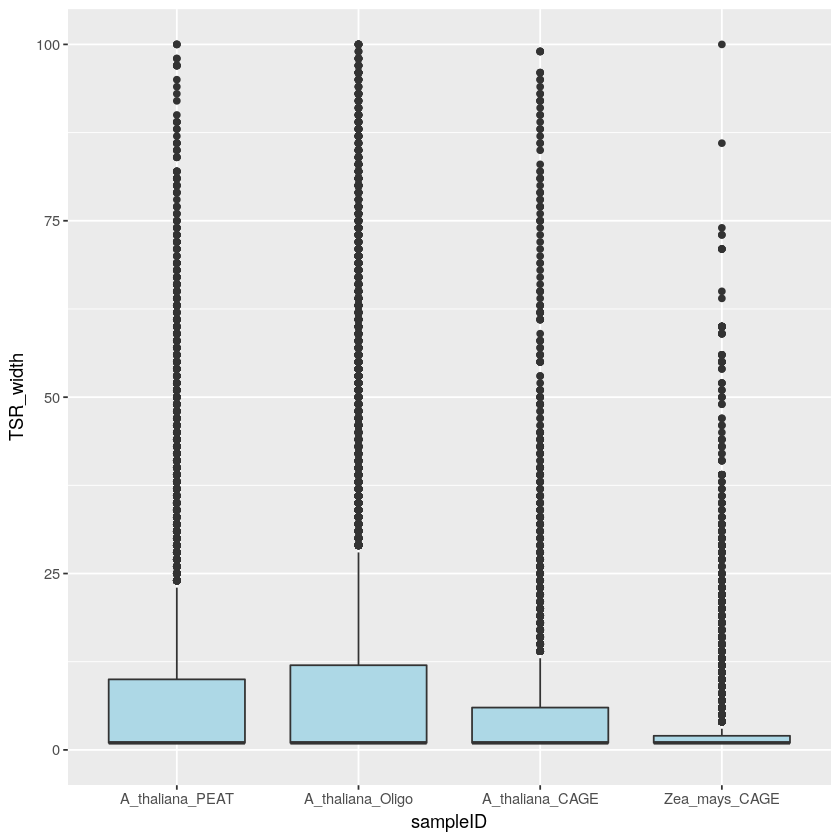

In [99]:
g + geom_boxplot(fill="lightblue") + scale_y_continuous(limits=c(0,100))

In [100]:
ggsave(filename="TSR_widths_boxplot.png")

Saving 6.67 x 6.67 in image
Warning message:
“Removed 190 rows containing non-finite values (stat_boxplot).”

### Two-sided T-tests to ask whether the TSR widths are different

In [107]:
t.test(AtPEAT_width,zmCAGE_width, alternative='greater')


	Welch Two Sample t-test

data:  AtPEAT_width and zmCAGE_width
t = 38.054, df = 23455, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.281006      Inf
sample estimates:
mean of x mean of y 
 8.190099  3.715680 


In [108]:
t.test(TokVec_width,zmCAGE_width, alternative='greater')


	Welch Two Sample t-test

data:  TokVec_width and zmCAGE_width
t = 58.015, df = 35362, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 6.892982      Inf
sample estimates:
mean of x mean of y 
 10.80980   3.71568 


In [109]:
t.test(TokCAGE_width,zmCAGE_width, alternative='greater')


	Welch Two Sample t-test

data:  TokCAGE_width and zmCAGE_width
t = 8.4418, df = 4737.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.460789      Inf
sample estimates:
mean of x mean of y 
 9.256235  3.715680 
